In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# 1. Introducción

El siguiente informe pretende brindar cierta información respecto de la evolución en los casos de Covid 19 a lo largo del mundo. Para esto utilizaremos un dataset publicado en kaggle con un total de 49068 valores. El mismo ofrece datos distribuidos por pais y región entre enero del 2020 a julio del 2020.

# 2 Configuración, limpieza y manipulación de datos

Luego de introducidos los datos se procede a realizar una primera aproximación de los mismos:

In [2]:
covid_dataframe = pd.read_csv('covid_19.csv')

In [3]:
covid_dataframe.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


Lo primero que se puede observar es que nuestros datos cuentan con un total de diez (10) columnas. De estas existen tres que no proveen información relevante: "Lat" y "Long" y "WHO Region. A su vez, los nombres de las mismas se encuentran complejizados y en ingles. Con lo cual, se procederá a renombrar las mismas. 

In [4]:
covid_dataframe.drop(['Lat', 'Long', 'WHO Region'], axis=1, inplace=True)
covid_dataframe.rename(columns={'Date':'Fecha de observacion',
                                'Province/State':'Estado',
                                'Country/Region':'País', 
                                'Confirmed': 'Confirmados',
                                'Deaths':'Muertes',
                                'Recovered':'Recuperados', 
                                'Active':'Activos'
                                                           }, inplace=True)
covid_dataframe['Fecha de observacion'] = pd.to_datetime(covid_dataframe['Fecha de observacion'])

In [5]:
covid_dataframe.head(10)

,Estado,País,Fecha de observacion,Confirmados,Muertes,Recuperados,Activos
0,NaN,Afghanistan,2020-01-22,0,0,0,0
1,NaN,Albania,2020-01-22,0,0,0,0
2,NaN,Algeria,2020-01-22,0,0,0,0
3,NaN,Andorra,2020-01-22,0,0,0,0
4,NaN,Angola,2020-01-22,0,0,0,0
5,NaN,Antigua and Barbuda,2020-01-22,0,0,0,0
6,NaN,Argentina,2020-01-22,0,0,0,0
7,NaN,Armenia,2020-01-22,0,0,0,0
8,Australian Capital Territory,Australia,2020-01-22,0,0,0,0
9,New South Wales,Australia,2020-01-22,0,0,0,0


In [6]:
covid_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Estado                14664 non-null  object        
 1   País                  49068 non-null  object        
 2   Fecha de observacion  49068 non-null  datetime64[ns]
 3   Confirmados           49068 non-null  int64         
 4   Muertes               49068 non-null  int64         
 5   Recuperados           49068 non-null  int64         
 6   Activos               49068 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 2.6+ MB


Una vez realizadas estas modificaciones se observa que la columna "Estado" posee varios datos vacios. Este faltante de información se verifica mediante el metodo info(), que nos muestra que hay unicamente 14664 valores no nulo en dicha coluimna. Por lo tanto, se procederá a llenar los mismos con la leyenda "NA" para visualizar dicha falta de información.

In [7]:
covid_df_filledNA = covid_dataframe.fillna('NA')

In [8]:
covid_df_filledNA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Estado                49068 non-null  object        
 1   País                  49068 non-null  object        
 2   Fecha de observacion  49068 non-null  datetime64[ns]
 3   Confirmados           49068 non-null  int64         
 4   Muertes               49068 non-null  int64         
 5   Recuperados           49068 non-null  int64         
 6   Activos               49068 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 2.6+ MB


# 3 Analisis de los datos

Una vez realizadas las modificaciones pertinentes, se procede a realizar el respectivo analisis de los datos:

## 3.1 Casos confirmados, muertes y recuperaciones a lo largo del tiempo

En primer lugar, se verificará la cantidad de casos confirmados, las muertes y recuperaciones a lo largo del tiempo. Para esto se utilizará una muestra de los paises con mas de cien (100) casos confirmados.

In [9]:
covid_dataframe_by_Country_and_Date = covid_df_filledNA.groupby(['País', 'Fecha de observacion'])[['País','Fecha de observacion','Confirmados', 'Muertes', 'Recuperados']].sum().reset_index()

In [10]:
covid_dataframe_by_confirmed_over_100 = covid_dataframe_by_Country_and_Date[covid_dataframe_by_Country_and_Date['Confirmados'] > 100]

In [11]:
covid_dataframe_by_Date = covid_dataframe_by_confirmed_over_100.groupby(['Fecha de observacion'])[['Fecha de observacion','Confirmados', 'Muertes', 'Recuperados']].sum().reset_index()

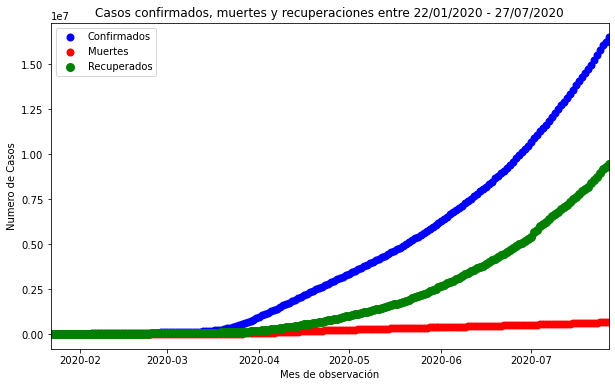

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(covid_dataframe_by_Date['Fecha de observacion'], covid_dataframe_by_Date['Confirmados'], color='blue',linewidths=2)
plt.scatter(covid_dataframe_by_Date['Fecha de observacion'], covid_dataframe_by_Date['Muertes'], color='red',linewidths=2)
plt.scatter(covid_dataframe_by_Date['Fecha de observacion'], covid_dataframe_by_Date['Recuperados'], color='green',linewidths=3)
plt.xlabel('Mes de observación')
plt.xlim(pd.Timestamp('2020-01-22'), pd.Timestamp('2020-07-27'))
plt.ylabel('Numero de Casos')
plt.title('Casos confirmados, muertes y recuperaciones entre 22/01/2020 - 27/07/2020')
plt.legend(['Confirmados', 'Muertes', 'Recuperados'])
plt.show()

A partir de este grafico se puede observa como, hasta el momento de la observación, la cantidad de casos confirmados, muertes y recuperaciones se encuentran en aumento. A su vez, se puede observar que la cantidad de recuperaciones es mayor a la de muertes. Sin embargo, la diferencia entre ambas es cada vez menor.

## 3.2 Paises con mayor cantidad de casos confirmados

A continuación se analizarán los paises con mayor cantidad de casos confirmados. Para esto se optará por verificar los diez (10) paises con mayor cantidad de casos. Se presentarán tanto los valores confirmados como una graficación de los mismos para una mejor visualización.

In [13]:
covid_dataframe_by_Country = covid_df_filledNA.groupby(['País'])[['Confirmados', 'Muertes', 'Recuperados']].max().reset_index()

In [14]:
covid_dataframe_by_Country.sort_values(by='Confirmados', ascending=False, inplace=True)

In [15]:
Covid_dataframe_confirmed_country = covid_dataframe_by_Country[['País', 'Confirmados']]

In [16]:
Covid_dataframe_confirmed_country.head(10)

,País,Confirmados
173,US,4290259
23,Brazil,2442375
79,India,1480073
138,Russia,816680
154,South Africa,452529
111,Mexico,395489
132,Peru,389717
35,Chile,347923
177,United Kingdom,300111
81,Iran,293606


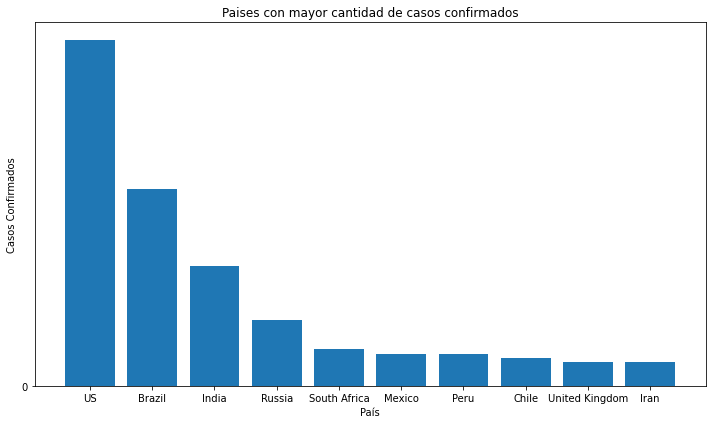

In [17]:
plt.figure(figsize=(10,6))
plt.bar(Covid_dataframe_confirmed_country['País'][:10], Covid_dataframe_confirmed_country['Confirmados'][:10])
plt.yticks(range(0,1))
plt.xlabel('País')
plt.ylabel('Casos Confirmados')
plt.title('Paises con mayor cantidad de casos confirmados')
plt.tight_layout()
plt.show()

A Partir de este grafico se puede observar que Estados Unidos es el pais con mayor cantidad de casos confirmados de Covid 19, con un total de 4290259 casos, seguido cercanamente por Brasil con un total de 2442375 casos registrados.

## 3.3 Paises con mayor cantidad de muertes confirmadas

Por ultimo, se procederá a observar los paises con mayor cantidad de muertes confirmadas. Para esto se optará por verificar los diez (10) paises con mayor cantidad de muertes.

In [18]:
covid_dataframe_by_Country.sort_values(by='Muertes',ascending=False, inplace=True)

In [19]:
covid_dataframe_deaths_country = covid_dataframe_by_Country[['País', 'Muertes']]

In [20]:
covid_dataframe_deaths_country.head(10)

,País,Muertes
173,US,148011
23,Brazil,87618
177,United Kingdom,45759
111,Mexico,44022
85,Italy,35112
79,India,33408
61,France,30096
157,Spain,28752
132,Peru,18418
81,Iran,15912


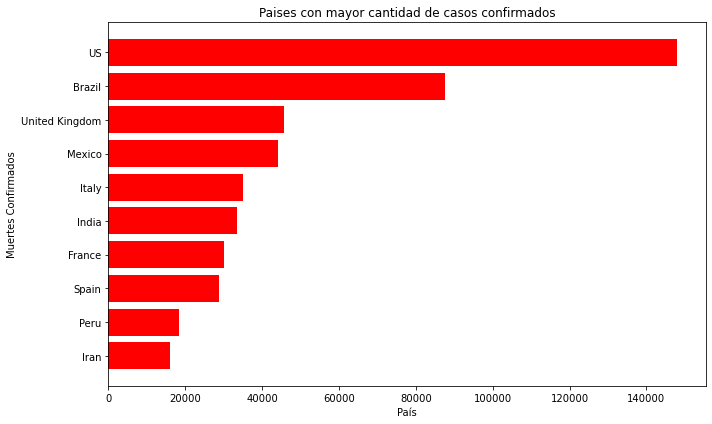

In [21]:
plt.figure(figsize=(10,6))
plt.barh(covid_dataframe_deaths_country['País'][:10], covid_dataframe_deaths_country['Muertes'][:10],color='red')
plt.xlabel('País')
plt.ylabel('Muertes Confirmados')
plt.title('Paises con mayor cantidad de casos confirmados')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

A partir de este grafico se puede observar como Estados Unidos (148011) y Brasil (87618) continuan liderando el ranking de paises con mayor cantidad de muertes confirmadas. Sin embargo, se puede observar El Reino Unido se encuentra en el tercer lugar con un total de 45991 muertes confirmadas, mostrando una mayor correlación entre casos confirmados y muertes confirmadas.